# Amazon Products Reviews - Use Case 2

#### by/Alaa Hassan

### NLP Approach to Mining Online Reviews using Topic Modeling 
##### Let’s first load all the necessary libraries:

In [1]:
import nltk
from nltk import FreqDist


In [2]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r'F:\A-W-S\UseCases\Use Case 2\Data\1429_1.csv.zip' ,low_memory=False)


In [4]:
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841667104676,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/5620406,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmag...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,"http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=200,http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=166",This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease.,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841667104676,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/5620406,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmag...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,"http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=200,http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=167",great for beginner or experienced person. Bought as a gift and she loves it,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841667104676,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/5620406,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmag...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,"http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=200,http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=167","Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...",Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841667104676,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmagenta/5620406,allnewfirehd8tablet8hddisplaywifi16gbincludesspecialoffersmag...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,"http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=200,http://reviews.bestbuy.com/3545/5620406/reviews.htm?format=embedded&page=167",I've had my Fire HD 8 two weeks now and I love it. This tablet is a great value.We are Prime Members and that is where this tablet SHINES. I love being able to easily access all of the Prime conte...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets","841667104676,amazon/53004484,amazon/b01ahb9cn2,0841

In [5]:
# Drop unnecessary columns
df = df.drop(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful','reviews.sourceURLs','reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],axis=1)

In [6]:
pd.set_option('display.max_columns', 10)
df['reviews.rating'].unique()

array([ 5.,  4.,  2.,  1.,  3., nan])

In [7]:
df['reviews.rating'] = df['reviews.rating'].fillna(0)


In [8]:
df['reviews.text'] = df['reviews.text'].astype('str')

In [9]:
df['reviews.rating'] = df['reviews.rating'].astype('int')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews.rating  34660 non-null  int32 
 1   reviews.text    34660 non-null  object
dtypes: int32(1), object(1)
memory usage: 406.3+ KB


#### Duplicate the imbalanced data


In [11]:
# duplicate DataFrame3 x 100
df1 = df[df['reviews.rating'].le(2)]
df1=df1.loc[df1.index.repeat(100)]
df1.head()

,reviews.rating,reviews.text
117,2,Didn't have some of the features I was looking for. Returned it the next day. May be good for others
117,2,Didn't have some of the features I was looking for. Returned it the next day. May be good for others
117,2,Didn't have some of the features I was looking for. Returned it the next day. May be good for others
117,2,Didn't have some of the features I was looking for. Returned it the next day. May be good for others
117,2,Didn't have some of the features I was looking for. Returned it the next day. May be good for others


In [12]:
df2 = df[df['reviews.rating'].eq(3)]
df2=df2.loc[df2.index.repeat(30)]


In [13]:
df3 = df[df['reviews.rating'].eq(4)]
df3=df3.loc[df3.index.repeat(4)]


In [14]:
df4 = df[df['reviews.rating'].eq(5)]
df4=df4.loc[df4.index.repeat(2)]

In [15]:
df1 = pd.DataFrame(df1, columns = ['reviews.rating', 'reviews.text'])
df2 = pd.DataFrame(df2, columns = ['reviews.rating', 'reviews.text'])
df3 = pd.DataFrame(df3, columns = ['reviews.rating', 'reviews.text'])
df4 = pd.DataFrame(df4, columns = ['reviews.rating', 'reviews.text'])


df = pd.concat([df1,df2, df3,df3,df4])
df.head()

,reviews.rating,reviews.text
117,2,Didn't have some of the features I was looking for. Returned it the next day. May be good for others
117,2,Didn't have some of the features I was looking for. Returned it the next day. May be good for others
117,2,Didn't have some of the features I was looking for. Returned it the next day. May be good for others
117,2,Didn't have some of the features I was looking for. Returned it the next day. May be good for others
117,2,Didn't have some of the features I was looking for. Returned it the next day. May be good for others


In [16]:
df['reviews.rating'].value_counts(ascending=True)

0     3300
2    40200
1    41000
3    44970
5    47550
4    68328
Name: reviews.rating, dtype: int64

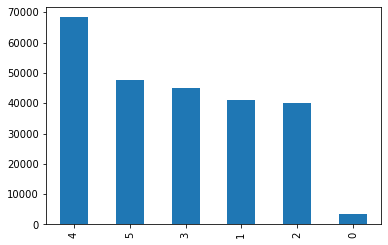

In [17]:
rate = ['0','1','2','3','4','5']
plt.figure(figsize= (6,4))
df['reviews.rating'].value_counts().plot(kind='bar');

#### Data Preprocessing

In [18]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

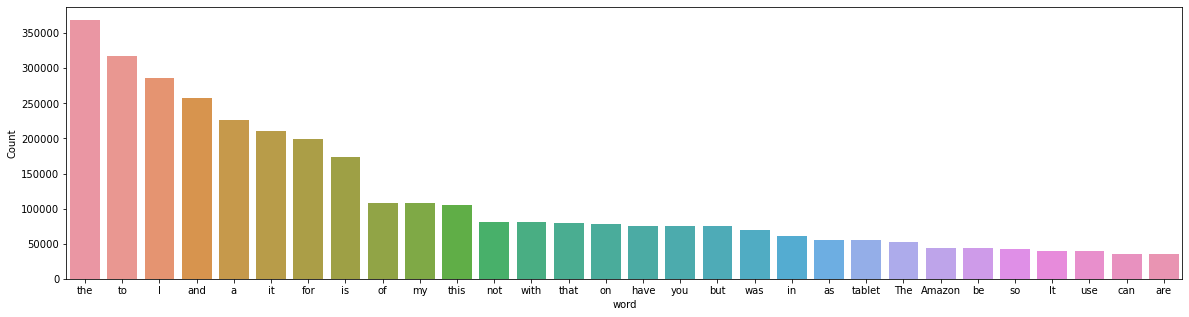

In [19]:
freq_words(df['reviews.text'])


In [20]:
# remove unwanted characters, numbers and symbols
df['reviews.text'] = df['reviews.text'].str.replace("[^a-zA-Z#]", " ")

In [21]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [22]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
df['reviews.text'] = df['reviews.text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df['reviews.text']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

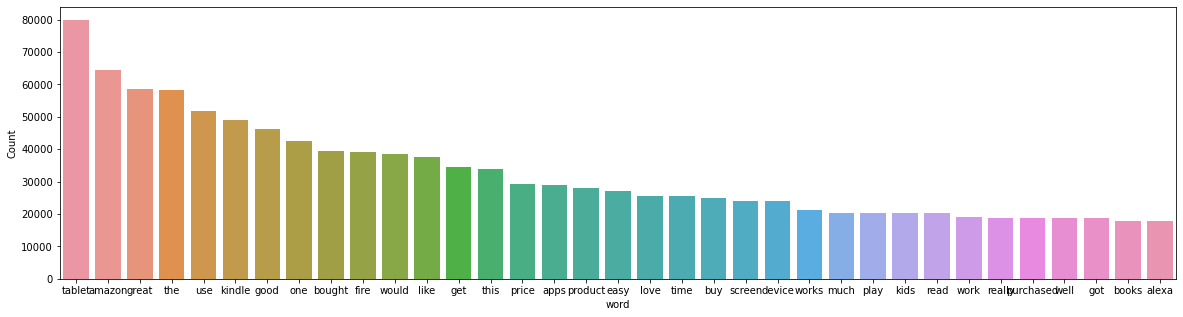

In [23]:
freq_words(reviews, 35)

In [24]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [25]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['didn', 'features', 'looking', 'returned', 'next', 'day', 'may', 'good', 'others']


In [26]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1]) # print lemmatized review

['next', 'day', 'other']


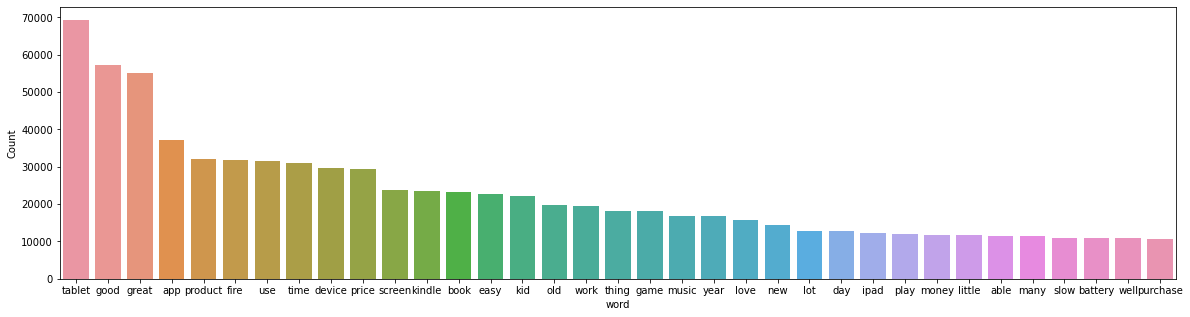

In [27]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

df['reviews'] = reviews_3

freq_words(df['reviews'], 35)

#### Building an LDA model

In [28]:
dictionary = corpora.Dictionary(reviews_2)


In [29]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]


In [30]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50)

In [31]:
lda_model.print_topics()


[(0,
  '0.059*"light" + 0.051*"device" + 0.044*"fast" + 0.039*"able" + 0.025*"small" + 0.025*"setup" + 0.024*"option" + 0.023*"reader" + 0.022*"simple" + 0.020*"news"'),
 (1,
  '0.145*"good" + 0.116*"product" + 0.043*"box" + 0.031*"purchase" + 0.029*"price" + 0.027*"smart" + 0.024*"feature" + 0.023*"control" + 0.021*"amazing" + 0.018*"wife"'),
 (2,
  '0.145*"fire" + 0.062*"cable" + 0.053*"movie" + 0.040*"stick" + 0.039*"new" + 0.031*"screen" + 0.027*"happy" + 0.026*"day" + 0.025*"way" + 0.024*"excellent"'),
 (3,
  '0.075*"tablet" + 0.060*"time" + 0.059*"app" + 0.045*"thing" + 0.040*"kid" + 0.035*"many" + 0.033*"gift" + 0.026*"play" + 0.024*"money" + 0.022*"lot"'),
 (4,
  '0.139*"easy" + 0.126*"use" + 0.051*"book" + 0.041*"kindle" + 0.038*"old" + 0.037*"year" + 0.036*"game" + 0.035*"home" + 0.029*"nice" + 0.027*"speaker"'),
 (5,
  '0.140*"love" + 0.069*"music" + 0.040*"work" + 0.034*"family" + 0.033*"much" + 0.032*"item" + 0.031*"fun" + 0.030*"perfect" + 0.029*"weather" + 0.027*"questio

In [32]:
# Print the Keyword in the 10 topics
lda_model.print_topics()

[(0,
  '0.059*"light" + 0.051*"device" + 0.044*"fast" + 0.039*"able" + 0.025*"small" + 0.025*"setup" + 0.024*"option" + 0.023*"reader" + 0.022*"simple" + 0.020*"news"'),
 (1,
  '0.145*"good" + 0.116*"product" + 0.043*"box" + 0.031*"purchase" + 0.029*"price" + 0.027*"smart" + 0.024*"feature" + 0.023*"control" + 0.021*"amazing" + 0.018*"wife"'),
 (2,
  '0.145*"fire" + 0.062*"cable" + 0.053*"movie" + 0.040*"stick" + 0.039*"new" + 0.031*"screen" + 0.027*"happy" + 0.026*"day" + 0.025*"way" + 0.024*"excellent"'),
 (3,
  '0.075*"tablet" + 0.060*"time" + 0.059*"app" + 0.045*"thing" + 0.040*"kid" + 0.035*"many" + 0.033*"gift" + 0.026*"play" + 0.024*"money" + 0.022*"lot"'),
 (4,
  '0.139*"easy" + 0.126*"use" + 0.051*"book" + 0.041*"kindle" + 0.038*"old" + 0.037*"year" + 0.036*"game" + 0.035*"home" + 0.029*"nice" + 0.027*"speaker"'),
 (5,
  '0.140*"love" + 0.069*"music" + 0.040*"work" + 0.034*"family" + 0.033*"much" + 0.032*"item" + 0.031*"fun" + 0.030*"perfect" + 0.029*"weather" + 0.027*"questio

#### Topics Visualization

In [33]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.174510  0.088077       1        1  20.030128
1      0.065673 -0.243044       2        1  14.958956
4      0.145256  0.197104       3        1  14.764038
2      0.202402 -0.225645       4        1  14.113320
6     -0.215972  0.053747       5        1  13.712915
0     -0.046695  0.256516       6        1  12.087563
5     -0.325173 -0.126755       7        1  10.333076, topic_info=           Term          Freq         Total Category  logprob  loglift
112       great  75930.000000  75930.000000  Default  30.0000  30.0000
47         good  55232.000000  55232.000000  Default  29.0000  29.0000
193        fire  52221.000000  52221.000000  Default  28.0000  28.0000
95         easy  52191.000000  52191.000000  Default  27.0000  27.0000
36          use  47359.000000  47359.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
713       sport   1601.620361   1602.798462   Topic7  -5.1032   2.2691
1532      radio   1593.829956   1595.006714   Topic7  -5.1081   2.2691
509   selection   1515.228638   1516.411743   Topic7  -5.1586   2.2690
874       music  18302.671875  25723.484375   Topic7  -2.6671   1.9295
695       whole   1785.267578   2472.571777   Topic7  -4.9946   1.9441

[270 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
206       6  0.999928       able
52        1  0.999839     access
285       5  0.999278    account
317       6  0.999729   addition
1521      7  0.999479      alarm
...     ...       ...        ...
844       4  0.999580  wonderful
39        7  0.999906       work
447       1  0.711284      worth
447       2  0.288676      worth
44        3  0.999912       year

[245 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 5, 3, 7, 1, 6])

#### Exploring the Data

In [34]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [35]:
df['reviews.text'].apply(lambda x: len(x.split(' '))).sum()


7414302

In [36]:
X = df['reviews.text']
y = df['reviews.rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

#### Naive Bayes Classifier for Multinomial Models


In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
target_names = 1 or 2 or 3 or 4 or 5
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

%matplotlib inline
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names= rate))

accuracy 0.7442293322464506
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       966
           1       0.88      0.92      0.90     12233
           2       0.92      0.86      0.89     12051
           3       0.82      0.65      0.72     13540
           4       0.59      0.84      0.69     20473
           5       0.73      0.44      0.55     14342

    accuracy                           0.74     73605
   macro avg       0.82      0.77      0.78     73605
weighted avg       0.77      0.74      0.74     73605



In [38]:
#Linear Support Vector Machine
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

%matplotlib inline

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names= rate))

accuracy 0.7017865634128116
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       966
           1       0.71      0.96      0.82     12233
           2       0.83      0.89      0.86     12051
           3       0.80      0.54      0.65     13540
           4       0.62      0.62      0.62     20473
           5       0.61      0.58      0.59     14342

    accuracy                           0.70     73605
   macro avg       0.75      0.76      0.75     73605
weighted avg       0.70      0.70      0.70     73605

